In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
hr = pd.read_csv('../Datasets/cases/Human_Resources_Analytics/HR_comma_sep.csv')
X = hr.drop('left', axis=1)
y = hr['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

In [3]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
trns = make_column_transformer((ohe, make_column_selector(dtype_include=object)), remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')
X_train_trns = trns.fit_transform(X_train)
X_test_trns = trns.transform(X_test)

In [4]:
dts = DecisionTreeClassifier(random_state=25 ,max_depth=2)
dts.fit(X_train_trns,y_train)
y_pred = dts.predict(X_test_trns)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      3429
           1       0.88      0.43      0.58      1070

    accuracy                           0.85      4499
   macro avg       0.86      0.71      0.74      4499
weighted avg       0.85      0.85      0.83      4499



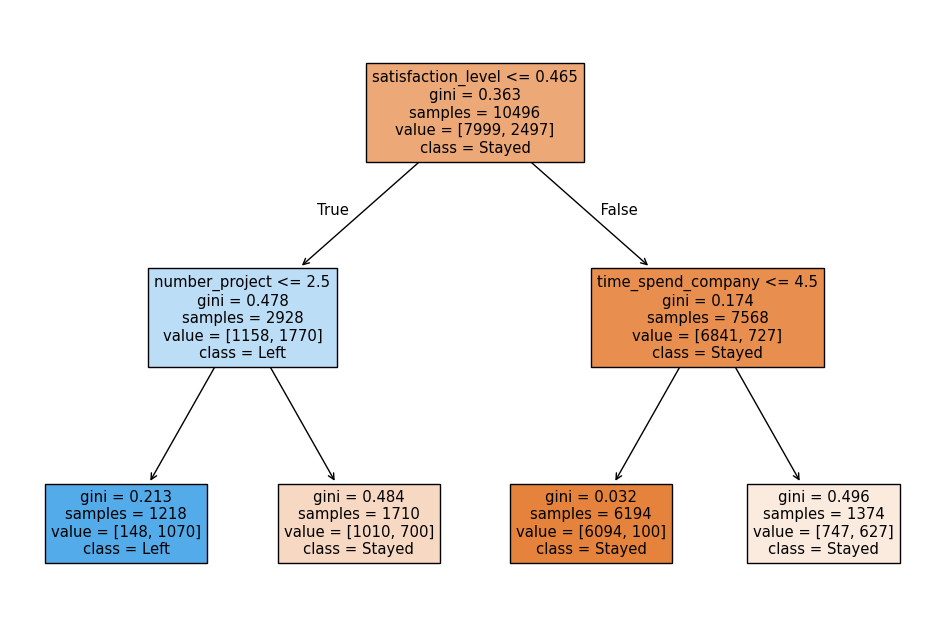

In [6]:
plt.figure(figsize=(12,8))
plot_tree(dts, feature_names=X_train_trns.columns, class_names=['Stayed','Left'], filled=True)
plt.show()